# Breast Cancer 

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()     
data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)

## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

Understanding of feature names and our target

In [109]:
print("Features\n")
print(cancer.feature_names)
print("Target labels\n")
print(cancer.target_names)

Features

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target labels

['malignant' 'benign']


Understanding of the dimensions of our dataset

In [110]:
df.shape

(569, 31)

So our dataset describs 569 samples of tumors and along with 30 features and the information if the tumor was malignant (0) or benign (1).

Taking a peek at our data

In [111]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,...,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119,0.0
1,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,...,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089,0.0
2,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,...,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088,0.0
3,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,...,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173,0.0
4,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,...,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077,0.0


In [112]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.111,0.116,0.244,0.139,0.173,0.056,...,26.40,166.10,2027.0,0.141,0.211,0.411,0.222,0.206,0.071,0.0
565,20.13,28.25,131.20,1261.0,0.098,0.103,0.144,0.098,0.175,0.055,...,38.25,155.00,1731.0,0.117,0.192,0.322,0.163,0.257,0.066,0.0
566,16.60,28.08,108.30,858.1,0.085,0.102,0.093,0.053,0.159,0.056,...,34.12,126.70,1124.0,0.114,0.309,0.340,0.142,0.222,0.078,0.0
567,20.60,29.33,140.10,1265.0,0.118,0.277,0.351,0.152,0.240,0.070,...,39.42,184.60,1821.0,0.165,0.868,0.939,0.265,0.409,0.124,0.0
568,7.76,24.54,47.92,181.0,0.053,0.044,0.000,0.000,0.159,0.059,...,30.37,59.16,268.6,0.090,0.064,0.000,0.000,0.287,0.070,1.0


A statistical summary of all attributes

In [113]:
pd.set_option('precision', 3)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,0.627
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,0.484
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055,0.000
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071,0.000
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,1.000
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,1.000
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207,1.000


**Class Destribution**

In [114]:
df.groupby('target').size()

target
0.0    212
1.0    357
dtype: int64

We can see that 212 instances are labeled as malignant and 357 as benign

**Correlation between attributes**

In [115]:
df.corr(method='pearson')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-3.116e-01,...,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007,-0.730
mean texture,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-7.644e-02,...,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119,-0.415
mean perimeter,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-2.615e-01,...,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051,-0.743
mean area,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-2.831e-01,...,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004,-0.709
mean smoothness,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,5.848e-01,...,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499,-0.359
mean compactness,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,5.654e-01,...,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687,-0.597
mean concavity,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,3.368e-01,...,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515,-0.696
mean concave points,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,1.669e-01,...,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369,-0.777
mean symmetry,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,4.799e-01,...,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438,-0.330
mean fractal dimension,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000e+00,...,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767,0.013


Let's see this in Matrix form

<IPython.core.display.Javascript object>


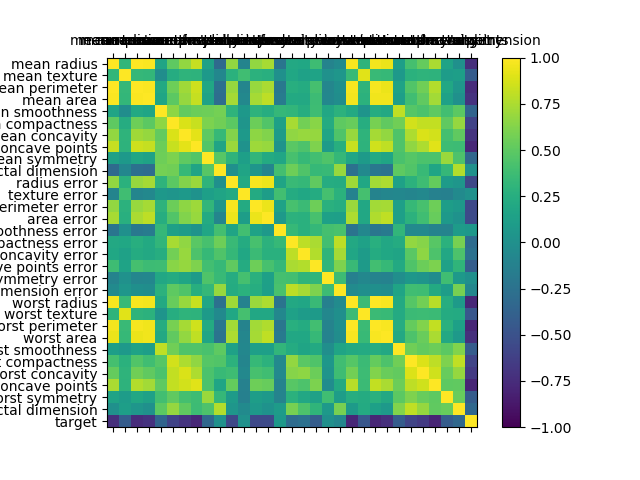

In [116]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(method='pearson'), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,31,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(df))
ax.set_yticklabels(list(df))
plt.show()

We can see that there is great correlation between mean radius, mean perimeter, mean area and their respective worst values and negative correlation with the target labels

Lets split the dataset to have a better visualisation

In [117]:
mean_df = df[['mean radius','mean texture','mean perimeter','mean area', 'mean smoothness', 'mean compactness','mean concavity', 'mean concave points','mean symmetry','mean fractal dimension']]
error_df = df[['radius error','texture error','perimeter error','area error', 'smoothness error', 'compactness error','concavity error', 'concave points error','symmetry error','fractal dimension error']]
worst_df = df[['worst radius','worst texture','worst perimeter','worst area', 'worst smoothness', 'worst compactness','worst concavity', 'worst concave points','worst symmetry','worst fractal dimension']]

<IPython.core.display.Javascript object>


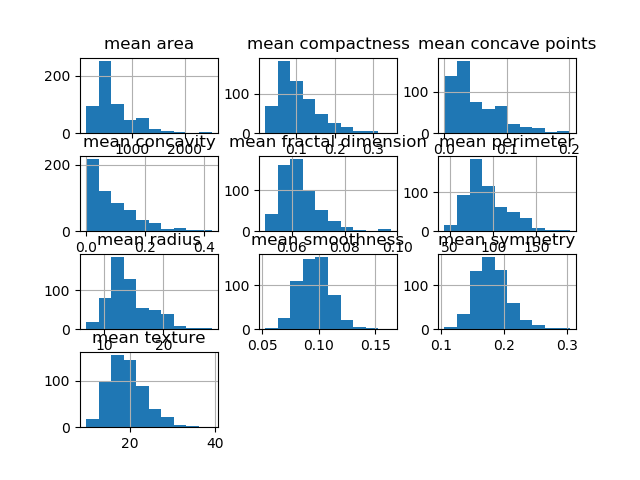

<function matplotlib.pyplot.show(*args, **kw)>

In [118]:
mean_h = mean_df.hist()
plt.show

<IPython.core.display.Javascript object>


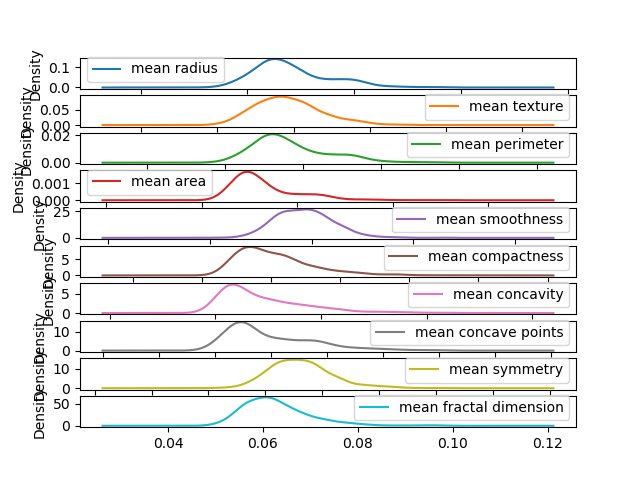

In [119]:
mean_df.plot(kind='density', subplots=True, sharex=False)
plt.show()

<IPython.core.display.Javascript object>


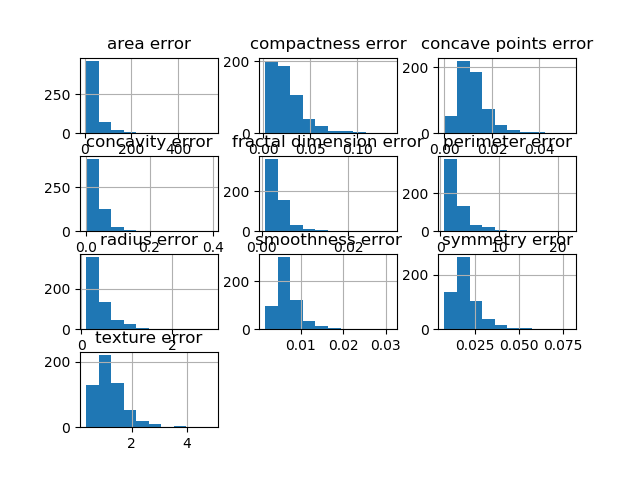

<function matplotlib.pyplot.show(*args, **kw)>

In [120]:
error_h = error_df.hist()
plt.show

<IPython.core.display.Javascript object>


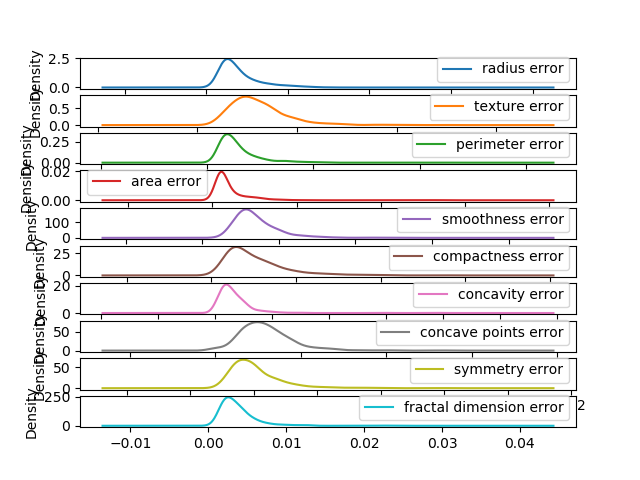

In [121]:
error_df.plot(kind='density', subplots=True, sharex=False)
plt.show()

<IPython.core.display.Javascript object>


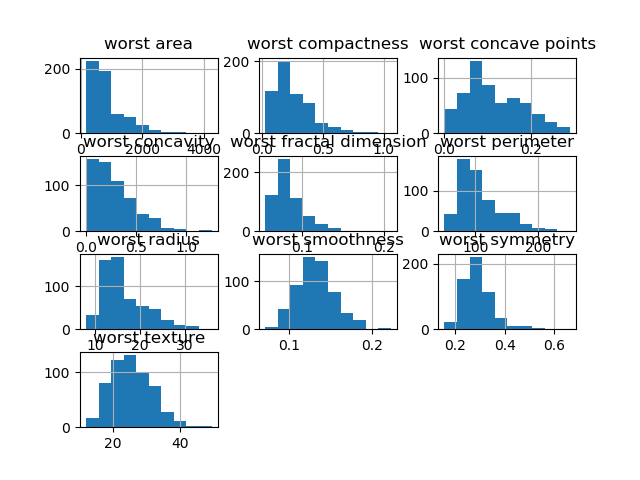

<function matplotlib.pyplot.show(*args, **kw)>

In [122]:
worst_h = worst_df.hist()
plt.show

<IPython.core.display.Javascript object>


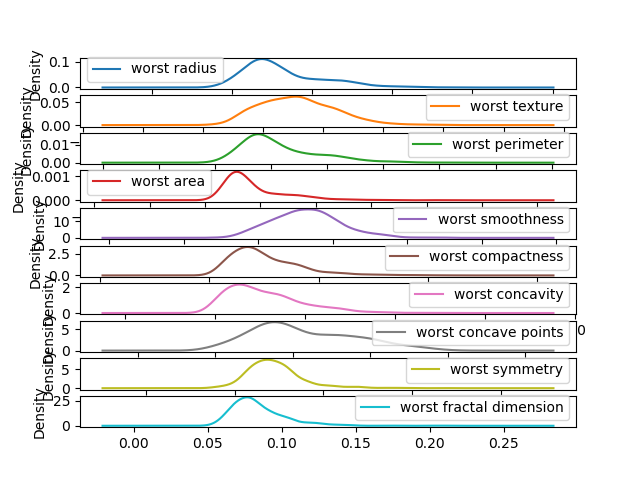

In [123]:
worst_df.plot(kind='density', subplots=True, sharex=False)
plt.show()

**Skew of Univariate Distributions**

In [124]:
df.skew()

mean radius                0.942
mean texture               0.650
mean perimeter             0.991
mean area                  1.646
mean smoothness            0.456
mean compactness           1.190
mean concavity             1.401
mean concave points        1.171
mean symmetry              0.726
mean fractal dimension     1.304
radius error               3.089
texture error              1.646
perimeter error            3.444
area error                 5.447
smoothness error           2.314
compactness error          1.902
concavity error            5.110
concave points error       1.445
symmetry error             2.195
fractal dimension error    3.924
worst radius               1.103
worst texture              0.498
worst perimeter            1.128
worst area                 1.859
worst smoothness           0.415
worst compactness          1.474
worst concavity            1.150
worst concave points       0.493
worst symmetry             1.434
worst fractal dimension    1.663
target    

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

In [125]:
# Rescale data (between 0 and 1)
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = df.values
# separate array into input and output components
X = array[:,0:30]
Y = array[:,30]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.521 0.023 0.546 0.364 0.594 0.792 0.703 0.731 0.686 0.606 0.356 0.12
  0.369 0.274 0.159 0.351 0.136 0.301 0.312 0.183 0.621 0.142 0.668 0.451
  0.601 0.619 0.569 0.912 0.598 0.419]
 [0.643 0.273 0.616 0.502 0.29  0.182 0.204 0.349 0.38  0.141 0.156 0.083
  0.124 0.126 0.119 0.081 0.047 0.254 0.085 0.091 0.607 0.304 0.54  0.435
  0.348 0.155 0.193 0.639 0.234 0.223]
 [0.601 0.39  0.596 0.449 0.514 0.431 0.463 0.636 0.51  0.211 0.23  0.094
  0.18  0.163 0.151 0.284 0.097 0.39  0.206 0.127 0.556 0.36  0.508 0.375
  0.484 0.385 0.36  0.835 0.404 0.213]
 [0.21  0.361 0.234 0.103 0.811 0.811 0.566 0.523 0.776 1.    0.139 0.176
  0.127 0.038 0.251 0.543 0.143 0.354 0.728 0.287 0.248 0.386 0.241 0.094
  0.915 0.814 0.549 0.885 1.    0.774]
 [0.63  0.157 0.631 0.489 0.43  0.348 0.464 0.518 0.378 0.187 0.234 0.093
  0.221 0.164 0.332 0.168 0.144 0.357 0.136 0.146 0.52  0.124 0.507 0.342
  0.437 0.172 0.319 0.558 0.158 0.143]]


## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

Since radius, perimeter and area are linearly related, let's keep just the radius

<IPython.core.display.Javascript object>


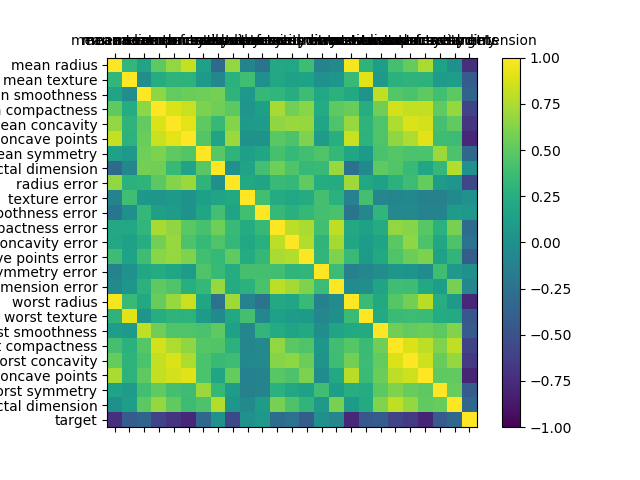

In [126]:
new_df = df[['mean radius','mean texture','mean smoothness', 'mean compactness','mean concavity', 'mean concave points',
             'mean symmetry','mean fractal dimension','radius error','texture error','smoothness error', 
             'compactness error','concavity error', 'concave points error','symmetry error','fractal dimension error',
             'worst radius','worst texture','worst smoothness', 'worst compactness','worst concavity', 
             'worst concave points','worst symmetry','worst fractal dimension','target']]
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(new_df.corr(method='pearson'), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,25,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(new_df))
ax.set_yticklabels(list(new_df))
plt.show()

In [127]:
# rescale data
X = new_df.values[:,0:24]
Y = new_df.values[:,24]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.521 0.023 0.594 0.792 0.703 0.731 0.686 0.606 0.356 0.12  0.159 0.351
  0.136 0.301 0.312 0.183 0.621 0.142 0.601 0.619 0.569 0.912 0.598 0.419]
 [0.643 0.273 0.29  0.182 0.204 0.349 0.38  0.141 0.156 0.083 0.119 0.081
  0.047 0.254 0.085 0.091 0.607 0.304 0.348 0.155 0.193 0.639 0.234 0.223]
 [0.601 0.39  0.514 0.431 0.463 0.636 0.51  0.211 0.23  0.094 0.151 0.284
  0.097 0.39  0.206 0.127 0.556 0.36  0.484 0.385 0.36  0.835 0.404 0.213]
 [0.21  0.361 0.811 0.811 0.566 0.523 0.776 1.    0.139 0.176 0.251 0.543
  0.143 0.354 0.728 0.287 0.248 0.386 0.915 0.814 0.549 0.885 1.    0.774]
 [0.63  0.157 0.43  0.348 0.464 0.518 0.378 0.187 0.234 0.093 0.332 0.168
  0.144 0.357 0.136 0.146 0.52  0.124 0.437 0.172 0.319 0.558 0.158 0.143]]


## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))

In [129]:
# The scoring function to use
scoring = 'accuracy'

In [130]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

 LR: 0.933302 (+/- 0.037422)
LDA: 0.952569 (+/- 0.046434)
SVM: 0.933177 (+/- 0.041450)


<IPython.core.display.Javascript object>


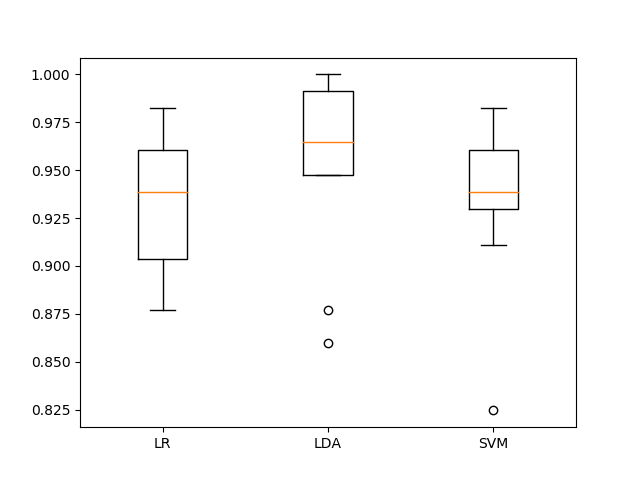

In [131]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

We can see that all models achieve a very high accuracy score and with Linear Discriminant Analysis we can achieve the highest accuracy.

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

In [132]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(models)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

0.9648809523809524


/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


We can optimize parameter C for logistic regression and c, kernel and gamma for svm

In [133]:
from sklearn.model_selection import GridSearchCV 

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma': 
              [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}
svr = models[2][1]
#svr = SVC()
grid = GridSearchCV(svr, parameters)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.kernel)
print(grid.best_estimator_.C)
print(grid.best_estimator_.gamma)

0.961335676625659
linear
8
0.01


In [134]:
parameters = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
clf = models[0][1]
grid = GridSearchCV(clf, parameters)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.C)
print(grid.best_estimator_.penalty)

0.961335676625659
100
l1


So let's rerun the ensemble with the optimized hyperparameters!

In [135]:
models = []
models.append(('LR',  LogisticRegression(C=100, penalty='l1')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(kernel='linear', C=8, gamma=0.01)))
ensemble = VotingClassifier(models)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

0.9648496240601503


/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Oddly enough, the mean accuracy is slightly decreased.

## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

In [74]:
from sklearn.model_selection import train_test_split
#Lets split the dataset to train and test
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [75]:
results = cross_val_score(ensemble, X_train, Y_train, cv=kfold)
print(results.mean())

/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

0.9583091787439614


/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [76]:
ensemble.fit(X_train, Y_train)
predicted = ensemble.predict(X_test)

/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [77]:
from sklearn.metrics import f1_score, confusion_matrix
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[35  5]
 [ 0 74]]


In [78]:
f1 = f1_score(Y_test, predicted)
print('F1 score: {0:0.2f}'.format(f1))

F1 score: 0.97
